**CURSO**: *Machine Learning* en Geociencias<br />
**Profesor**: Edier Aristizábal (evaristizabalg@unal.edu.co) <br />
**Credits**: The content of this notebook is taken from several sources: Every effort has been made to trace copyright holders of the materials used in this book. The author apologies for any unintentional omissions and would be pleased to add an acknowledgment in future editions.

# 04: Procesamiento de datos (*Feature Engineering*)

Luego de obtener e importar los datos se debe realizar una ardua tarea de limpieza y ajuste de los datos. En esta labor se transforman simples valores y datos crudos en realmente variables (*features*) que puedan permitir construir un modelo. Muchos autores consideran que esta fase corresponde al 80% del tiempo dedicado a *machine learning*, por lo cual los resultados finales obtenidos del modelo dependen en un porcentaje similar a la calidad de los datos y variables que conforman el modelo, que se obtiene como resultado de esta fase.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Las principales librerias utilizadas para el procesamiento de los datos corresponden a *Pandas* y *Numpy*. Sin embargo existen funciones en otros librerías que mas adelante se utilizarán. Por ahora solo importaremos estas dos fundamentales librerías.

In [ ]:
import pandas as pd
import numpy as np

## Web scraping

In [ ]:
from IPython.display import IFrame
from IPython.core.display import HTML
from bs4 import BeautifulSoup
from IPython.display import IFrame

In [ ]:
# IFrame will allow us to view the HTML document
IFrame(src='https://edieraristizabal.github.io/MachineLearning/', width=800, height=400)

In [ ]:
# Open a file and pass the file handle (here file handle is f) to BeautifulSoup
file_name = '/content/drive/MyDrive/CATEDRA/MACHINE LEARNING/MachineLearning/data/Machine learning en geociencias _ MachineLearning.html'
with open(file_name) as f:  #Windows users may need to add the option encoding='utf8'
    stock_soup = BeautifulSoup(f, 'html.parser')

In [ ]:
print(stock_soup)

In [ ]:
# Look at first 1000 characters to see head of the document (don't want to print too much or it's messy)
print(stock_soup.prettify()[:1000])

<!DOCTYPE html>
<!-- saved from url=(0051)https://edieraristizabal.github.io/MachineLearning/ -->
<html lang="en-US">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <!-- Begin Jekyll SEO tag v2.8.0 -->
  <title>
   Machine learning en geociencias | MachineLearning
  </title>
  <meta content="Jekyll v3.9.2" name="generator"/>
  <meta content="Machine learning en geociencias" property="og:title"/>
  <meta content="en_US" property="og:locale"/>
  <meta content="Curso del posgrado en Recursos hidráulicos de la Facultad de Minas, Universidad Nacional de Colombia, sede Medellín" name="description"/>
  <meta content="Curso del posgrado en Recursos hidráulicos de la Facultad de Minas, Universidad Nacional de Colombia, sede Medellín" property="og:description"/>
  <link href="https://edieraristizabal.github.io/MachineLearning/" rel="ca

In [ ]:
# One possible solution
tag_list = []
for tag in stock_soup.find_all():
    tag_list.append(tag.name)

tag_count_dict = {}
for tag_name in tag_list:
    if tag_name in tag_count_dict:
        tag_count_dict[tag_name] = tag_count_dict[tag_name] + 1
    else:
        tag_count_dict[tag_name] = 1
        
tag_count_dict

{'html': 1,
 'head': 1,
 'meta': 13,
 'title': 1,
 'link': 2,
 'script': 3,
 'body': 1,
 'div': 1,
 'header': 1,
 'h1': 2,
 'a': 27,
 'p': 10,
 'small': 2,
 'section': 1,
 'strong': 1,
 'em': 8,
 'h2': 5,
 'ul': 1,
 'li': 20,
 'footer': 1}

In [ ]:
stock_soup.find_all("li")

[<li><a href="https://edieraristizabal.github.io/MachineLearning/NOTEBOOKS/01_Ambiente_de_trabajo.ipynb">Ambiente de trabajo</a></li>,
 <li><a href="https://edieraristizabal.github.io/MachineLearning/NOTEBOOKS/02_Importar.ipynb">Importar datos</a></li>,
 <li><a href="https://edieraristizabal.github.io/MachineLearning/NOTEBOOKS/03_DataFrame.ipynb">Creación de la base de datos</a></li>,
 <li><a href="https://edieraristizabal.github.io/MachineLearning/NOTEBOOKS/04_Procesamiento_datos.ipynb">Procesamiento de datos</a></li>,
 <li><a href="https://edieraristizabal.github.io/MachineLearning/NOTEBOOKS/05_EDA.ipynb">Análisis exploratorio de datos</a></li>,
 <li><a href="https://edieraristizabal.github.io/MachineLearning/NOTEBOOKS/06_SeleccionVariables.ipynb">Selección de variables</a></li>,
 <li><a href="https://edieraristizabal.github.io/MachineLearning/NOTEBOOKS/07_Desbalance.ipynb">Datos desbalanceados</a></li>,
 <li><a href="https://edieraristizabal.github.io/MachineLearning/NOTEBOOKS/08_Va

In [ ]:
import urllib # package required to interact with live webpage
site_url='https://edieraristizabal.github.io/MachineLearning/'
r = urllib.request.urlopen(site_url)
site_content = r.read().decode('utf-8')

# Saving scraped HTML to .html file (for later processing)
with open('saved_page.html', 'w') as f:
    f.write(site_content)

# Use html.parser to create soup
s = BeautifulSoup(site_content, 'html.parser')

In [ ]:
# Look at the soup object by using prettify() method
print(s.prettify()[:500]) # Only show portion of text as it is very long

<!DOCTYPE html>
<html lang="en-US">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <!-- Begin Jekyll SEO tag v2.8.0 -->
  <title>
   Machine learning en geociencias | MachineLearning
  </title>
  <meta content="Jekyll v3.9.2" name="generator">
   <meta content="Machine learning en geociencias" property="og:title">
    <meta content="en_US" property="og:locale">
     <meta content


## Datos locales

Para este ejercicio vamos a trabajar con la base de datos de torrencialidad del libro 3.

In [ ]:
data= pd.read_excel('https://github.com/edieraristizabal/MachineLearning/blob/master/data/Torrencialidad_DB_vf.xlsx?raw=true', sheet_name='Tabla R')
data.head(10)

,Main Stream Order,Color,Categoria,Number of streams,Stream Lenght,Main Stream Leght,Stream Lenght Ratio,Bifurcation Ratio,Ro Coefficient,Lenght of Basin,...,Constant Channel mantenance,Drainage Intensity,Infiltrarion Number,Leght of overland flow,Relief,Mean Basin Slope,Relief Ratio,Rudgeness Number,Melton Index,Flash flood record
0,2.0,Azul,A,3.0,4.9820,4.048,0.907351,2.0,2.204219,5.904,...,1.030309,0.602168,0.567260,0.515155,1.319,24.320,0.223408,1.280198,0.582183,AB
1,2.0,Azul,B,3.0,6.5693,NaN,0.531716,NaN,NaN,8.961,...,2.065365,0.456670,0.107055,1.032682,1.968,28.100,0.219618,0.952858,0.534278,AB
2,NaN,Azul,C,NaN,NaN,18.117,1.496572,kklk,2.099288,20.617,...,NaN,0.376731,0.111298,0.919901,2.484,28.860,0.120483,1.350146,0.324482,AB
3,3.0,Rojo,B,31.0,26.4590,6.152,NaN,5.0,2.965810,NaN,...,0.455800,1.171624,5.639499,0.227900,0.903,20.669,0.125434,1.981134,0.260024,AB
4,2.0,NaN,C,4.0,10.4070,7.350,5.128386,3.0,NaN,9.523,...,1.027962,0.384357,0.363731,NaN,1.299,17.790,0.136407,1.263665,0.397153,AB
5,4.0,Rojo,A,30.0,70.2940,NaN,2.282589,2.275,2.041470,32.542,...,1.733206,0.426779,0.142070,NaN,2.599,26.390,0.079866,1.499533,0.235463,AB
6,3.0,Rojo,C,9.0,NaN,2.576,1.061497,NaN,2.570182,3.101,...,0.380531,2.569226,17.742808,NaN,0.674,26.696,0.217349,1.771209,0.583774,AB
7,3.0,NaN,A,52468.0,8.3480,3.536,1.822621,3.0,1.469104,4.218,...,NaN,1.317681,NaN,NaN,NaN,31.098,0.239924,1.826633,0.470570,AB
8,2.0,Azul,B,NaN,NaN,NaN,1.400547,7.0,4.998046,22.711,...,1.591711,0.268258,0.105883,0.795855,1.755,21.470,0.077275,1.102587,0.254728,AB
9,3.0,Azul,A,15.0,15.8950,6.774,1.869667,NaN,1.626193,7.592,...,0.434917,0.943693,4.989059,0.217458,1.518,19.550,NaN,3.490324,0.577349,AB


In [ ]:
data["Categoria"].unique()

array(['A', 'B', 'C', 'E', nan], dtype=object)

In [ ]:
data.shape

(73, 31)

Se construye tambien, a partir de la tabla importada, el vector de la variable dependiente (y) y la matriz con las variables independientes (X).

In [ ]:
X=data.drop(['Flash flood record'],axis=1)
y=data['Flash flood record']

Inicialmente es importante obtener datos generales de la base de datos, tales como el número de variables (columnas) y el número de observaciones (filas) con que se cuenta, utilizando el método *shape*.

In [ ]:
X.shape

(73, 30)

Es importante también conocer el nombre de las variables o columnas, el número de datos no nulos que tiene cada una, y el tipo de datos. Para esto utilizaremos la función *info*.

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Main Stream Order             72 non-null     float64
 1   Color                         67 non-null     object 
 2   Categoria                     69 non-null     object 
 3   Number of streams             70 non-null     float64
 4   Stream Lenght                 69 non-null     float64
 5   Main Stream Leght             67 non-null     float64
 6   Stream Lenght Ratio           72 non-null     float64
 7   Bifurcation Ratio             69 non-null     object 
 8   Ro Coefficient                69 non-null     float64
 9   Lenght of Basin               71 non-null     float64
 10  Area                          72 non-null     float64
 11  Perimeter                     69 non-null     float64
 12  Form Factor                   68 non-null     float64
 13  Elongat

En ocasiones es necesario conocer el número de datos unicos que presenta cada columna, especialmente para variables categóricas, ya que dicho número representa el número de categorias o conjuntos del dominio de dicha variable. A continuación se observa que variables como *color*, las cuales representan un atributo de mi objeto de estudio, tiene solo 4 colores, para la variable categórica se presentan 3 diferentes valores y para la columna final, que representa la variable objetivo, tiene solo dos opciones, es decir que corresponde a una variable dicotómica.

In [ ]:
X.nunique()

Main Stream Order                4
Color                            3
Categoria                        4
Number of streams               44
Stream Lenght                   69
Main Stream Leght               66
Stream Lenght Ratio             72
Bifurcation Ratio               50
Ro Coefficient                  69
Lenght of Basin                 71
Area                            72
Perimeter                       68
Form Factor                     68
Elongation Ratio                71
Circularity Ratio               70
Compactness Coefficient         71
Texture Ratio                   68
Fitness Ratio                   71
Wandering ratio                 73
Stream Frequency                70
Drainage Density                71
Constant  Channel mantenance    71
Drainage Intensity              70
Infiltrarion Number             70
Leght of overland flow          67
Relief                          72
Mean Basin Slope                71
Relief Ratio                    72
Rudgeness Number    

La función *columns* permite conocer el nombre de cada una de las variables o columnas de mi base de datos. De tal forma que pueda posteriormente llamarla utilizando el nombre adecuado.

In [ ]:
X.columns

Index(['Main Stream Order', 'Color', 'Categoria', 'Number of streams',
       'Stream Lenght', 'Main Stream Leght ', 'Stream Lenght Ratio',
       'Bifurcation Ratio ', 'Ro Coefficient', 'Lenght of Basin', 'Area ',
       'Perimeter', 'Form Factor', 'Elongation Ratio', 'Circularity Ratio',
       'Compactness Coefficient', 'Texture Ratio', 'Fitness Ratio',
       'Wandering ratio', 'Stream Frequency', 'Drainage Density',
       'Constant  Channel mantenance', 'Drainage Intensity',
       'Infiltrarion Number', 'Leght of overland flow', 'Relief',
       'Mean Basin Slope', 'Relief Ratio', 'Rudgeness Number', 'Melton Index'],
      dtype='object')

La función *values* permite obtener una matriz con los valores de toda la base de datos, o como en este caso de una sola columna. Existen muchas funciones que no trabajan con columnas de un DataFrame, por lo cual se requiere convertirlas a una matriz o un vector.

In [ ]:
X.Color.values

array(['Azul', 'Azul', 'Azul', 'Rojo', nan, 'Rojo', 'Rojo', nan, 'Azul',
       'Azul', nan, 'Rojo', 'Rojo', nan, 'Rojo', 'Verde', 'Azul', 'Azul',
       'Azul', 'Rojo', 'Rojo', 'Rojo', 'Rojo', 'Verde', 'Azul', 'Azul',
       'Azul', 'Rojo', 'Rojo', 'Rojo', 'Rojo', 'Verde', 'Azul', 'Azul',
       'Azul', 'Rojo', 'Rojo', nan, 'Rojo', 'Verde', 'Azul', 'Azul',
       'Azul', 'Rojo', 'Rojo', 'Rojo', 'Rojo', nan, 'Azul', 'Azul',
       'Azul', 'Rojo', 'Rojo', 'Rojo', 'Rojo', 'Verde', 'Azul', 'Azul',
       'Azul', 'Rojo', 'Rojo', 'Rojo', 'Rojo', 'Verde', 'Azul', 'Azul',
       'Azul', 'Rojo', 'Rojo', 'Rojo', 'Rojo', 'Verde', 'Azul'],
      dtype=object)

Y para obtener el tipo de datos se puede utilizar la funcion *dtypes*. En este caso la mayoría de datos son tipo flotante, es decir números no enteros, a excepción de las variables categóricas que estan como objetos y la variable objetivo que presenta como tipo de datos enteros (0,1).

In [ ]:
X.dtypes

Main Stream Order               float64
Color                            object
Categoria                        object
Number of streams               float64
Stream Lenght                   float64
Main Stream Leght               float64
Stream Lenght Ratio             float64
Bifurcation Ratio                object
Ro Coefficient                  float64
Lenght of Basin                 float64
Area                            float64
Perimeter                       float64
Form Factor                     float64
Elongation Ratio                float64
Circularity Ratio               float64
Compactness Coefficient         float64
Texture Ratio                   float64
Fitness Ratio                   float64
Wandering ratio                 float64
Stream Frequency                float64
Drainage Density                float64
Constant  Channel mantenance    float64
Drainage Intensity              float64
Infiltrarion Number             float64
Leght of overland flow          float64


## Valores faltantes

La función *info* ya nos señaló que todas las columnas no tienen el mismo número de datos, lo cual este indicando la ausencia de valores (NaN) en diferentes observaciones (filas). Estos valores se pueden dar por que efectivamente no se levantó dicho dato, o por que no fue leido adecuadamente los datos que existían en esta posición. Es importante conocer de cual de los casos se trata.

Para identificar si en una variable existen valores faltantes se utiliza la función *notnull*, la cual verifica si no es un valor nulo. Donde la respuesta sea falso es por que en esta posición existe un NaN.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Main Stream Order             72 non-null     float64
 1   Color                         67 non-null     object 
 2   Categoria                     69 non-null     object 
 3   Number of streams             70 non-null     float64
 4   Stream Lenght                 69 non-null     float64
 5   Main Stream Leght             67 non-null     float64
 6   Stream Lenght Ratio           72 non-null     float64
 7   Bifurcation Ratio             69 non-null     object 
 8   Ro Coefficient                69 non-null     float64
 9   Lenght of Basin               71 non-null     float64
 10  Area                          72 non-null     float64
 11  Perimeter                     69 non-null     float64
 12  Form Factor                   68 non-null     float64
 13  Elongat

In [ ]:
data.isna().any()

Main Stream Order                True
Color                            True
Categoria                        True
Number of streams                True
Stream Lenght                    True
Main Stream Leght                True
Stream Lenght Ratio              True
Bifurcation Ratio                True
Ro Coefficient                   True
Lenght of Basin                  True
Area                             True
Perimeter                        True
Form Factor                      True
Elongation Ratio                 True
Circularity Ratio                True
Compactness Coefficient          True
Texture Ratio                    True
Fitness Ratio                    True
Wandering ratio                 False
Stream Frequency                 True
Drainage Density                 True
Constant  Channel mantenance     True
Drainage Intensity               True
Infiltrarion Number              True
Leght of overland flow           True
Relief                           True
Mean Basin S

In [ ]:
pd.notnull(X['Main Stream Order'])

0      True
1      True
2     False
3      True
4      True
      ...  
68     True
69     True
70     True
71     True
72     True
Name: Main Stream Order, Length: 73, dtype: bool

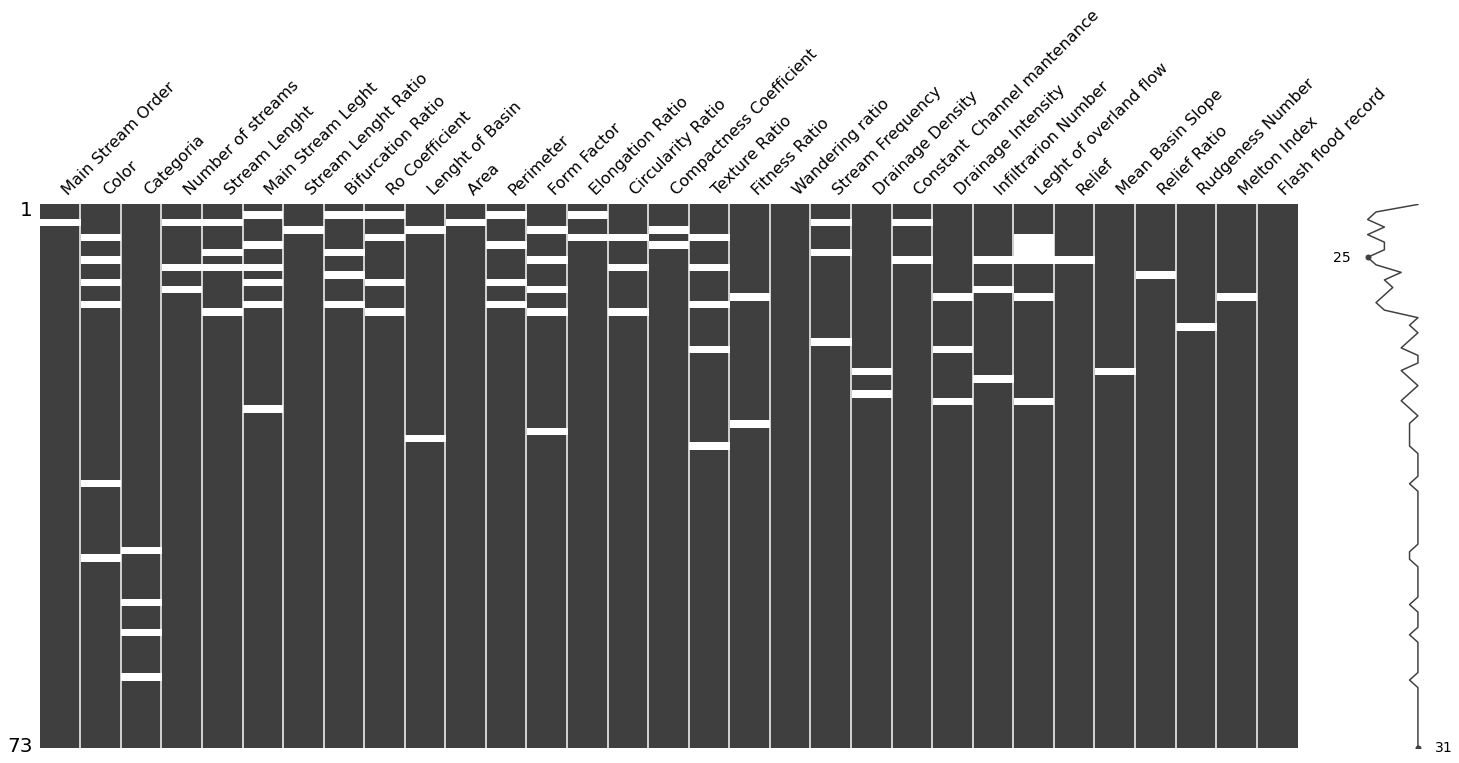

In [ ]:
import missingno as msno
msno.matrix(data)

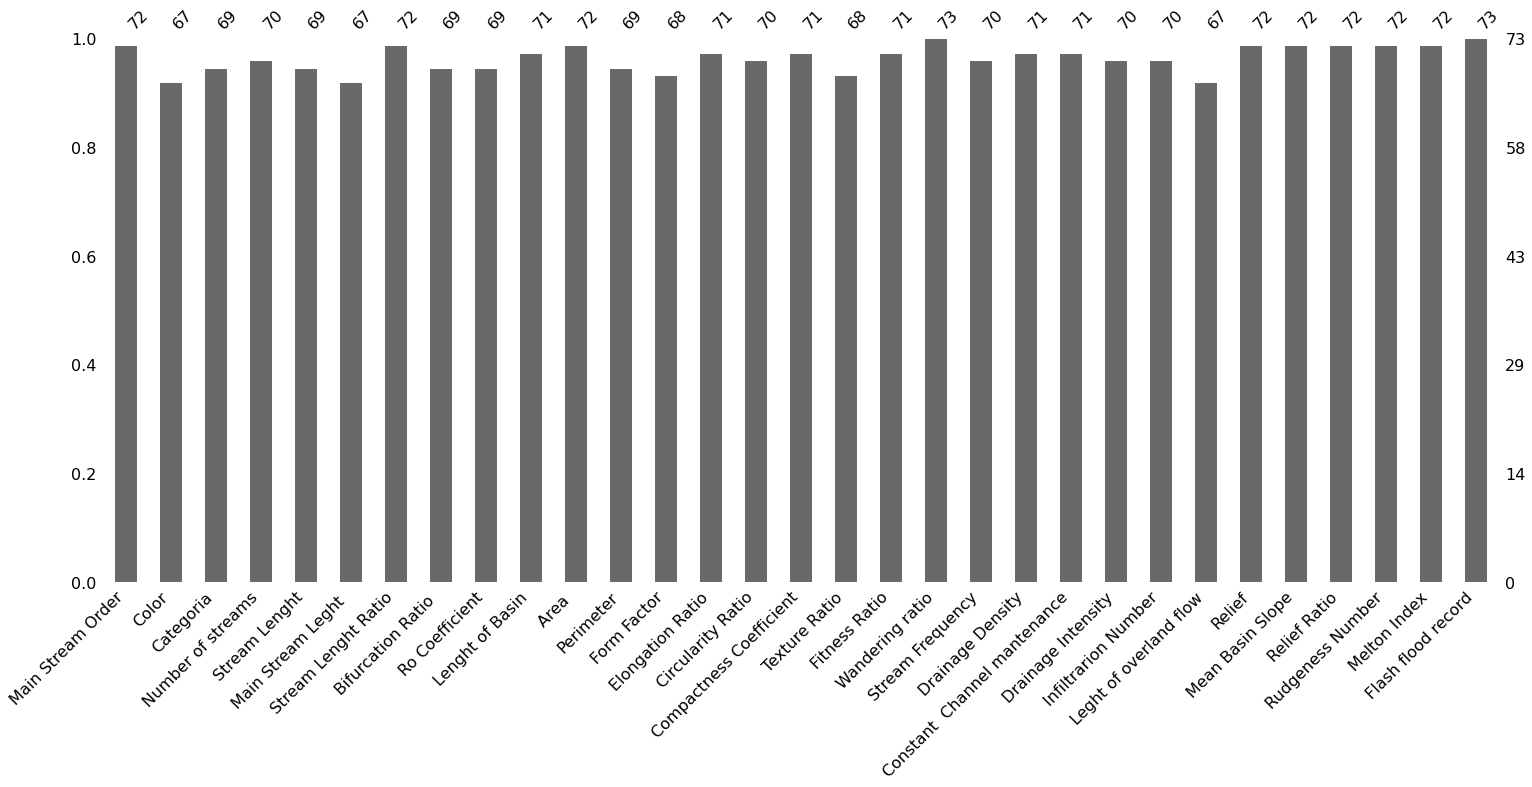

In [ ]:
msno.bar(data)

La función *isnull* concatenada con las funciones *values* y *ravel* nos permiten obtener el número de NaN existentes.

In [ ]:
sum(X['Main Stream Order'].isnull().values)

1

Si se desea conocer cuantas filas tienen valores *nan* en algún lado se utiliza la siguiente función:

In [ ]:
sum([True for idx,row in X.iterrows() if any(row.isnull())])

32

In [ ]:
data.shape

(73, 31)

Para saber cuantas posiciones en total corresponden a *nan* se utiliza:

In [ ]:
X.isnull().values.ravel().sum()

83

## Imputación

Luego de identificar las columnas, filas y posiciones que presentan valores nulos, se procede a eliminar o reemplazar estos valores. En ambos casos existen diferentes alternativas segun la cantidad de datos que se tienen y el número de valores nulos, entre otros criterios.

Con la librearía *Feature Selector* se puede utilizar la funcion *Remove*:

In [ ]:
train_no_missing = fs.remove(methods = ['missing'])

Para eliminar la columna o fila que presenta dicho valor nulo se utilizan diferentes criterios. en el caso de la columna o variable se prefiere eliminar cuando se tiene un número importante de valores nulos. Es decir se presentan pocas observaciones o datos de esta variable, por lo tanto no será de mucha ayuda en el modelo. En el caso de preferir eliminar la fila, ya que es una o pocas observaciones de esta variable que presentan valores nulos, se analiza si se cuenta con suficientes observaciones (filas).

Para cualquiera de estos casos se utiliza la función *dropna*, especificando en el argumento *axis* si corresponde a una fila (0) o a una columna (1). En el argumento *how* se define el criterio para borrar la fila o columna. En el caso de *all* la función borra solo si todos los valores de dicha fila o columna son NaN. Y *any* borra solo con la presencia de un valor NaN.

In [ ]:
data2=data.dropna(axis=0,how='any')
data2.shape

(41, 31)

In [ ]:
data3=data.dropna(axis=0,how='any')
data3.shape

(41, 31)

In [ ]:
data3.head(2)

,Main Stream Order,Color,Categoria,Number of streams,Stream Lenght,Main Stream Leght,Stream Lenght Ratio,Bifurcation Ratio,Ro Coefficient,Lenght of Basin,...,Constant Channel mantenance,Drainage Intensity,Infiltrarion Number,Leght of overland flow,Relief,Mean Basin Slope,Relief Ratio,Rudgeness Number,Melton Index,Flash flood record
0,2.0,Azul,A,3.0,4.982,4.048,0.907351,2.0,2.204219,5.904,...,1.030309,0.602168,0.56726,0.515155,1.319,24.32,0.223408,1.280198,0.582183,AB
15,5.0,Verde,C,173.0,290.076,42.482,2.360309,3.5375,1.559641,45.233,...,1.013703,0.596395,0.58038,0.506852,2.704,24.74,0.059779,2.667447,0.157687,AB


En caso de no preferir borrar la fila o columna se procede a reemplazar dicho dato. Existen diferentes formas:
- Llenar con un valor de cero (0) o cualquier otro valor que permita trabajar con los datos pero que se identifique todo el tiempo que correspondía a un valor nulo. 
- reempalazar el valor faltante con la media.
- y finalmente reemplazar el NaN con el valor siguiente proximo (*ffill*) o con el valor anterior próximo (*backfill*).

A continuación se presentan cada una de estas opciones.

In [ ]:
data['Main Stream Order']

0     2.0
1     2.0
2     NaN
3     3.0
4     2.0
     ... 
68    2.0
69    5.0
70    2.0
71    3.0
72    2.0
Name: Main Stream Order, Length: 73, dtype: float64

In [ ]:
Main_Stream=data['Main Stream Order'].fillna(0)
Main_Stream.head(5)

0    2.0
1    2.0
2    0.0
3    3.0
4    2.0
Name: Main Stream Order, dtype: float64

In [ ]:
data4=data['Main Stream Order'].fillna(data['Main Stream Order'].min())
data4.head(5)

0    2.0
1    2.0
2    2.0
3    3.0
4    2.0
Name: Main Stream Order, dtype: float64

In [ ]:
data5=data['Main Stream Order'].fillna(method='ffill')
data5.head(10)

0    2.0
1    2.0
2    2.0
3    3.0
4    2.0
5    4.0
6    3.0
7    3.0
8    2.0
9    3.0
Name: Main Stream Order, dtype: float64

In [ ]:
data6=data['Main Stream Order'].fillna(method='backfill')
data6.head(10)

0    2.0
1    2.0
2    3.0
3    3.0
4    2.0
5    4.0
6    3.0
7    3.0
8    2.0
9    3.0
Name: Main Stream Order, dtype: float64

In [ ]:
data7=data['Main Stream Order'].interpolate(limit=30, limit_direction='both')
print(data7)

0     2.0
1     2.0
2     2.5
3     3.0
4     2.0
     ... 
68    2.0
69    5.0
70    2.0
71    3.0
72    2.0
Name: Main Stream Order, Length: 73, dtype: float64


Una opción intermedia es eliminar la columna o fila solo si sobrepasa un porcentaje de valores nulos predefinidos como umbral.

In [ ]:
umbral = 0.05 # 5% de los datos es nulo
data7= data[data.columns[data.isnull().mean() < umbral]]
data7.shape

(73, 21)

In [ ]:
data.isnull().mean()

Main Stream Order               0.013699
Color                           0.082192
Categoria                       0.054795
Number of streams               0.041096
Stream Lenght                   0.054795
Main Stream Leght               0.082192
Stream Lenght Ratio             0.013699
Bifurcation Ratio               0.054795
Ro Coefficient                  0.054795
Lenght of Basin                 0.027397
Area                            0.013699
Perimeter                       0.054795
Form Factor                     0.068493
Elongation Ratio                0.027397
Circularity Ratio               0.041096
Compactness Coefficient         0.027397
Texture Ratio                   0.068493
Fitness Ratio                   0.027397
Wandering ratio                 0.000000
Stream Frequency                0.041096
Drainage Density                0.027397
Constant  Channel mantenance    0.027397
Drainage Intensity              0.041096
Infiltrarion Number             0.041096
Leght of overlan

In [ ]:
data.isnull().mean() < 0.2

Main Stream Order               True
Color                           True
Categoria                       True
Number of streams               True
Stream Lenght                   True
Main Stream Leght               True
Stream Lenght Ratio             True
Bifurcation Ratio               True
Ro Coefficient                  True
Lenght of Basin                 True
Area                            True
Perimeter                       True
Form Factor                     True
Elongation Ratio                True
Circularity Ratio               True
Compactness Coefficient         True
Texture Ratio                   True
Fitness Ratio                   True
Wandering ratio                 True
Stream Frequency                True
Drainage Density                True
Constant  Channel mantenance    True
Drainage Intensity              True
Infiltrarion Number             True
Leght of overland flow          True
Relief                          True
Mean Basin Slope                True
R

In [ ]:
data8 = data.loc[data.isnull().mean(axis=1) < umbral]
data8.shape

(56, 31)

En caso de corresponder a una variable categórica, los valores nulos se pueden reemplazar con la categoria que mas se repite de la siguiente forma:

In [ ]:
data9 = data['Color']
data9

0      Azul
1      Azul
2      Azul
3      Rojo
4       NaN
      ...  
68     Rojo
69     Rojo
70     Rojo
71    Verde
72     Azul
Name: Color, Length: 73, dtype: object

In [ ]:
data['Color'].value_counts().idxmax()

'Rojo'

In [ ]:
data9 = data['Color'].fillna(data['Color'].value_counts().idxmax())
data9

0      Azul
1      Azul
2      Azul
3      Rojo
4      Rojo
      ...  
68     Rojo
69     Rojo
70     Rojo
71    Verde
72     Azul
Name: Color, Length: 73, dtype: object

In [ ]:
data['Color']

0      Azul
1      Azul
2      Azul
3      Rojo
4       NaN
      ...  
68     Rojo
69     Rojo
70     Rojo
71    Verde
72     Azul
Name: Color, Length: 73, dtype: object

In [ ]:
data10=data['Color'].fillna("Verde")
data10.head(5)

0     Azul
1     Azul
2     Azul
3     Rojo
4    Verde
Name: Color, dtype: object

In [ ]:
data11=data.Color.fillna(method='ffill')
data11

0      Azul
1      Azul
2      Azul
3      Rojo
4      Rojo
      ...  
68     Rojo
69     Rojo
70     Rojo
71    Verde
72     Azul
Name: Color, Length: 73, dtype: object

In [ ]:
data['Color'].fillna(data['Color'].value_counts().idxmax(), inplace=True)
data['Color'].head(5)

0    amarillo
1       verde
2       verde
3    amarillo
4        rojo
Name: Color, dtype: object

## Outlier detection

Los modelos geometricos, es decir que están basados en distancias, como los modelos de regresión, son sensibles a los *outliers*, ya que generan diferencias muy grandes en la estimación de la función de costo. Es por esto necesario identificar y eliminar dichos valores anómalos.

Se puede utilizar la desviación estandar para identificar dichos valores y eliminarlos. A continuación se utiliza como factor o número de desviaciones estandar (3) para definir un límite inferior y superior. Posteriomente se filtran las filas de la base de datos con los valores que estén dentro de dicho rango.

In [ ]:
factor = 1
upper_lim = data['Stream Lenght'].mean() + data['Stream Lenght'].std() * factor
lower_lim = data['Stream Lenght'].mean() - data['Stream Lenght'].std() * factor

data10 = data[(data['Stream Lenght'] < upper_lim) & (data['Stream Lenght'] > lower_lim)]
data10.shape

(69, 31)

De forma similar se puede realizar, pero utilizando los percentiles, en este caso 95% y 5%.

In [ ]:
upper_lim = data['Stream Lenght'].quantile(.95)
lower_lim = data['Stream Lenght'].quantile(.05)

data11 = data[(data['Stream Lenght'] < upper_lim) & (data['Stream Lenght'] > lower_lim)]
data11.shape

(61, 31)

Otra forma de hacerlo, eliminando los valores por encima y por debajo de los percentiles indicados es:

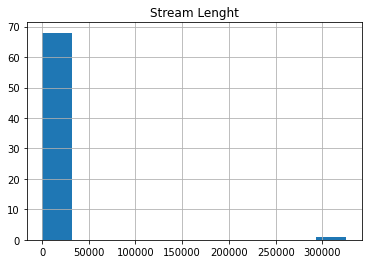

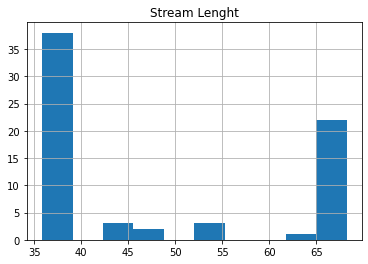

In [ ]:
y=data['Stream Lenght']
pd.DataFrame(y).hist();
stream=data['Stream Lenght']
UPPERBOUND, LOWERBOUND = np.nanpercentile(stream, [50,70])
y = np.clip(stream, UPPERBOUND, LOWERBOUND)
pd.DataFrame(y).hist();

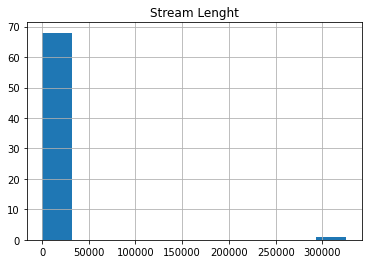

In [ ]:
y=data['Stream Lenght']
pd.DataFrame(y).hist();

Si se prefiere no eliminarlos, se pueden reemplazar con los límites definidos.

In [ ]:
upper_lim = data['Stream Lenght'].quantile(.95)
lower_lim = data['Stream Lenght'].quantile(.05)
data.loc[(data['Stream Lenght'] > upper_lim),['Stream Lenght']] = upper_lim
data.loc[(data['Stream Lenght'] < lower_lim),['Stream Lenght']] = lower_lim
print(upper_lim,lower_lim)

In [ ]:
data.head()

La librería *Feature Selector* permite identificar las variables que presentas un valor único, y que por lo tanto no son de utilidad para el modelo. 

In [ ]:
fs.identify_single_unique()
single_unique = fs.ops['single_unique']
single_unique
fs.unique_stats.sample(5)

0 features with a single unique value.



,nunique
Drainage Intensity,72
Fitness Ratio,73
Area,73
Lenght of Basin,73
Perimeter,71


Tambien se puede graficar el número de valores únicos para cada variable independiente.

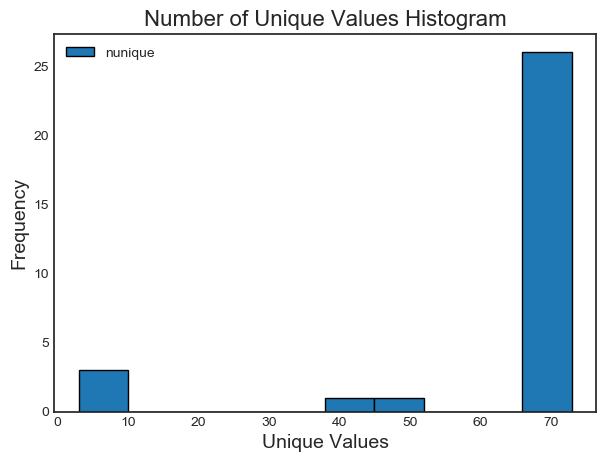

In [ ]:
fs.plot_unique()

## Binning

Segmentar o definir intervalos en una variable continua o redefinir las categorias en una variable cualitativa, puede ser útil en algunos casos. 

Para el caso de una variable numérica continua que se desee modificar a una variable categórica se puede utilizar el siguiente código.

In [ ]:
data13=data['Stream Lenght']
print(data13.max())
print(data13.min())
data13 = pd.cut(data13, bins=[0,100,200,300,400,500,600], labels=["low", "low mid","mid","high mid","high","very high"])
data13.head(5)

325687.0
3.719


0    low
1    low
2    NaN
3    low
4    low
Name: Stream Lenght, dtype: category
Categories (6, object): ['low' < 'low mid' < 'mid' < 'high mid' < 'high' < 'very high']

Para el caso de una variable categórica que se quiera reclasificar en un valor menor de categorias se puede utilizar el siguiente código.

In [ ]:
lista=pd.DataFrame(data=['Spain', 'Italy', 'Australia', 'Chile', 'Brazil'], columns=['paises'])

conditions = [
    lista['paises'].str.contains('Spain'),
    lista['paises'].str.contains('Italy'),
    lista['paises'].str.contains('Chile'),
    lista['paises'].str.contains('Brazil')]

choices = ['Europe', 'Europe', 'South America', 'South America']

continente= np.select(conditions, choices, default='Other')
continente

array(['Europe', 'Europe', 'Other', 'South America', 'South America'],
      dtype='<U13')

## Variables categóricas

Las variables categóricas deben ser transformadas a un valor numérico de tal forma que se pueda trabajar con ellas en los métodos de *machine learning*. Para eso existen diferentes estrategias de acuerdo con el caso de cada variable.

De forma general se puede transformar una variable categórica en variables numéricas de la siguiente forma.

In [ ]:
data["Categoria"].unique()

array(['A', 'B', 'C', 'E', nan], dtype=object)

In [ ]:
Cat={'A':1,'B':2,'C':3, "E":4}
data['Categoria']=data['Categoria'].map(Cat)
data['Categoria'].head(5)

0    1.0
1    2.0
2    3.0
3    2.0
4    3.0
Name: Categoria, dtype: float64

Sin embargo la librería de *machine learning* Science Kit Learning (sckitlearn) presenta diferentes funciones para esta labor. la primera de ellas *LabelEncoder*. Con esta función se transforman las variables en número enteros de acuerdo con el número de categorias que existan.

In [ ]:
data.Categoria

0     A
1     B
2     C
3     B
4     C
     ..
68    A
69    C
70    A
71    B
72    A
Name: Categoria, Length: 73, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le=LabelEncoder()
X['Categoria']=le.fit_transform(X['Categoria'])
X['Categoria']

0     0
1     1
2     2
3     1
4     2
     ..
68    0
69    2
70    0
71    1
72    0
Name: Categoria, Length: 73, dtype: int64

Sin embargo, la trasformación anterior puede generar problemas en el modelo ya que en los números consecutivos asignados existe una jerarquía o peso, es decir el 2 > 1, lo cual no necesariamente se presente en la variable categórica original. 

En estos casos se recomienda utilizar una tranformación binaria  (0,1) a cada categoria, por lo tanto se obtendran nuevas variables en igual número de categorias de la variable a transformar.  es decir que aumenta el número de dimensiones del problema a resolver.

In [ ]:
data['Categoria']

0     A
1     B
2     C
3     B
4     C
     ..
68    A
69    C
70    A
71    B
72    A
Name: Categoria, Length: 73, dtype: object

In [ ]:
data15=np.array(data['Categoria']).reshape(-1,1)
data15

array([['A'],
       ['B'],
       ['C'],
       ['B'],
       ['C'],
       ['A'],
       ['C'],
       ['A'],
       ['B'],
       ['A'],
       ['B'],
       ['C'],
       ['B'],
       ['C'],
       ['A'],
       ['C'],
       ['A'],
       ['B'],
       ['A'],
       ['B'],
       ['C'],
       ['B'],
       ['C'],
       ['A'],
       ['C'],
       ['A'],
       ['B'],
       ['A'],
       ['B'],
       ['C'],
       ['B'],
       ['C'],
       ['A'],
       ['C'],
       ['A'],
       ['B'],
       ['A'],
       ['B'],
       ['C'],
       ['E'],
       ['C'],
       ['A'],
       ['C'],
       ['A'],
       ['B'],
       ['A'],
       [nan],
       ['C'],
       ['B'],
       ['C'],
       ['A'],
       ['C'],
       ['A'],
       [nan],
       ['A'],
       ['B'],
       ['C'],
       [nan],
       ['C'],
       ['A'],
       ['C'],
       ['A'],
       ['B'],
       [nan],
       ['B'],
       ['C'],
       ['B'],
       ['C'],
       ['A'],
       ['C'],
       ['A'],
      

In [ ]:
ohe=OneHotEncoder(sparse=False)
data15=np.array(X['Categoria']).reshape(-1,1)
data15=ohe.fit_transform(data15)
data15

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0.

Otra forma de hacerlo directamente es con la función *get_dummies*.

In [ ]:
data.Color.unique()

array(['Azul', 'Rojo', nan, 'Verde'], dtype=object)

In [ ]:
data15=pd.get_dummies(data, prefix='Col', columns=['Color'])
data15.head()

,Main Stream Order,Categoria,Number of streams,Stream Lenght,Main Stream Leght,Stream Lenght Ratio,Bifurcation Ratio,Ro Coefficient,Lenght of Basin,Area,...,Leght of overland flow,Relief,Mean Basin Slope,Relief Ratio,Rudgeness Number,Melton Index,Flash flood record,Col_Azul,Col_Rojo,Col_Verde
0,2.0,A,3.0,4.9820,4.048,0.907351,2.0,2.204219,5.904,5.133,...,0.515155,1.319,24.320,0.223408,1.280198,0.582183,AB,1,0,0
1,2.0,B,3.0,6.5693,NaN,0.531716,NaN,NaN,8.961,13.568,...,1.032682,1.968,28.100,0.219618,0.952858,0.534278,AB,1,0,0
2,NaN,C,NaN,NaN,18.117,1.496572,kklk,2.099288,20.617,NaN,...,0.919901,2.484,28.860,0.120483,1.350146,0.324482,AB,1,0,0
3,3.0,B,31.0,26.4590,6.152,NaN,5.0,2.965810,NaN,12.060,...,0.227900,0.903,20.669,0.125434,1.981134,0.260024,AB,0,1,0
4,2.0,C,4.0,10.4070,7.350,5.128386,3.0,NaN,9.523,10.698,...,NaN,1.299,17.790,0.136407,1.263665,0.397153,AB,0,0,0


Para adicionar nuevas columnas y eliminar columnas del dataFrame, se utiliza:

In [ ]:
new_columns=pd.get_dummies(data['Color'],prefix='color')
data15=data.join(new_columns).drop(data['Color'])

## Escalar

Algunos algoritmos de *machine learning*, tales como Neural Networks, regresión, KNN, support vector machine, PCA, y análisis discriminante linear no se desempeñan adecuadamente si las variables (features) no están en la misma escala. Es por esta razón que se deben escalar, de tal forma que los modelos basados en medir distancias presenten resultados coherentes. En términos generales se tienen las siguientes recomendaciones:

- Utilice MinMaxScaler por defecto                                                                                           
- Utilice RobustScaler si tiene outliers y un gran rango entre variables                                                     
- Utilice StandardScaler si necesita normalizar las variables 

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer

StandardScaler escala cada columna para que tenga media 0 y varianza 1.

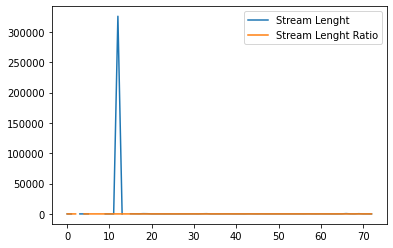

In [ ]:
data15=data[['Stream Lenght','Stream Lenght Ratio']]
st = StandardScaler()
data16 = st.fit_transform(data15)
data15.plot()
#print(data16)

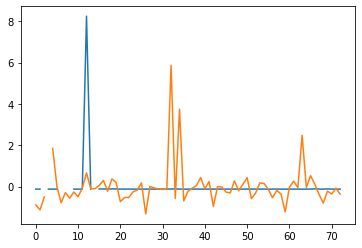

In [ ]:
plt.plot(data16)

RobustScaler sustrae de cada columna la media y divide por el rango intercuartil.

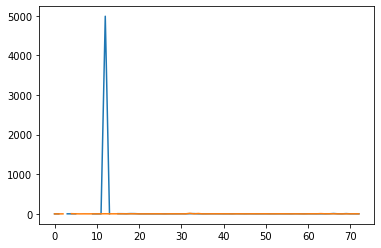

In [ ]:
rs=RobustScaler()
data17 = rs.fit_transform(data15)
plt.plot(data17)

MinMaxScaler obtiene la media de la columna y divide por el rango

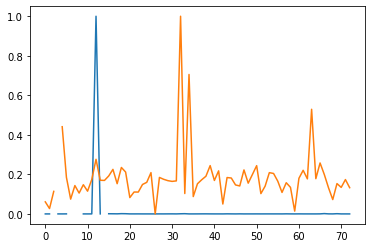

In [ ]:
mm = MinMaxScaler()
data18 = mm.fit_transform(data15)
plt.plot(data18)

La función *Normalizer* a diferencia de las otras opera sobre las filas, y aplica por defecto la normalización conocidad como l2.

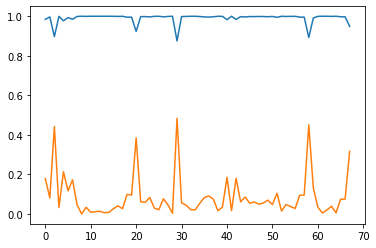

In [ ]:
n = Normalizer()
data15=data15.dropna()
data19 = n.fit_transform(data15)
plt.plot(data19)